In [1]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py

# 이분법<br>Bisection Method

## 배경<br>Background

다시 10의 제곱근을 구한다고 생각해 보자.<br>Again, let's try to find the square root of 10.

$$
f(x)=x^2-10 = 0
$$

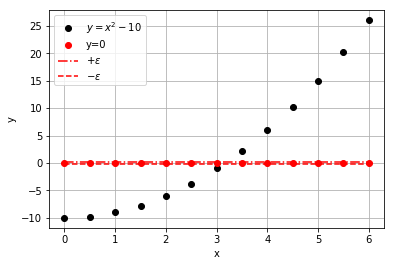

In [35]:
# x 의 범위와 간격을 지정 
# Specify range and interval of x
x_start = 0
x_end = 6
#x의 간격
x_interval = 0.5

#함수에 대한 수식 이해해보기
#x_간격이 정의되지않으면  x의 간격은 x의 끝-x의 초기값(시작값, 끝값, 간격) 설정
def plot(x_start, x_end, x_interval=None):
    if x_interval is None:
        x_interval = x_end - x_start
    #x의 값을 설정 0부터 6까지 0.5 간격으로
    x = py.arange(x_start, x_end+0.1*x_interval, x_interval)
    # y = x^2
    py.plot(x, x**2 - 10, 'ko', label='$y=x^2-10$')
    # y = 0
    py.plot(x, py.zeros_like(x), 'ro', label='y=0')

    # +/- epsilon 입실론의 값
    epsilon=0.15
    #입실론에대한 함수추가 상한선,하한선
    py.plot(x, epsilon * py.ones_like(x), 'r-.', label='$+\epsilon$')
    py.plot(x, -epsilon * py.ones_like(x), 'r--', label='$-\epsilon$')

    # x 축 이름표 함수
    # x axis label
    py.xlabel('x')

    # y 축 이름표 함수 py.ylabel()
    # y axis label
    py.ylabel('y')

    # 범례 표시 함수 py.legend()
    # Show legend
    py.legend()

    # 모눈 표시 함수 py.grid()
    # Indicate grid
    py.grid()

plot(x_start, x_end, x_interval)

함수 $f(x) = x^2-10$은 구간 $0 \le x \le 6$ 에서 연속이고 부호가 최소한 한번 바뀐다.<br>
Function $f(x) = x^2-10$ is continuous within $0 \le x \le 6$ and changes its sign at least once.

이는 구간 $0 \le x \le 6$ 에서 최소한 한 $x$ 값은 $f(x)=0$ 을 만족한다는 것을 뜻한다. 이런 $x$ 가 우리가 찾고 싶어 햐는 $f(x)$의 근이다.<br>
This means that there is at least one $x$ satisfying $f(x)=0$. Such $x$ would be the root of $f(x)$ that we would like to find.

## 이분법<br>Bisection Method

이분법은 처음에는 $x=0$, $x=6$ 두 점에서 출발한다.<br>
The algorithm starts at the two points of $x=0$ and $x=6$.

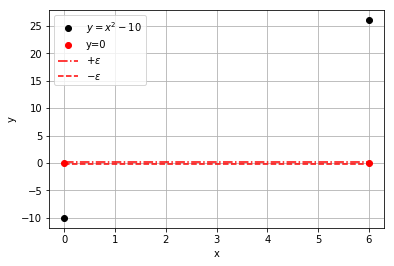

In [36]:
#함수을 초기화
py.clf()
#시작점과 끝점을 설정하여
plot(0, 6)

이분법은 이 $0 \le x \le 6$ 구간을 $0 \le x \le 3$, $3 \le x \le 6$ 두 구간으로 나눈다.<br>
Bisection method divides this $0 \le x \le 6$ interval into $0 \le x \le 3$ and  $3 \le x \le 6$ intervals.

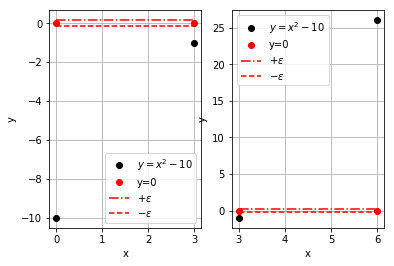

In [44]:
#그래프를 초기화
py.clf()
#그래프 하나는 
py.subplot(1, 2, 1)
plot(0, 3)
#그래프의 
py.subplot(1, 2, 2)
plot(3, 6)

$0 \le x \le 3$ 구간에서는 $f(x)$의 부호가 바뀌지 않았지만, $3 \le x \le 6$ 구간에서는 변했다.<br>
Within the $0 \le x \le 3$ interval, $f(x)$ did not change its sign but did in $3 \le x \le 6$ interval.

$0 \le x \le 3$ 구간에는 $f(x)$의 근이 없을 듯 싶지만, $3 \le x \le 6$ 구간에는 반드시 있을 것이다.<br>
Within the $0 \le x \le 3$ interval, $f(x)$ may not have a root but would in $3 \le x \le 6$ interval.

이제는 $3 \le x \le 6$ 구간만 검토한다.<br>Now we would evaluate interval $3 \le x \le 6$ only.

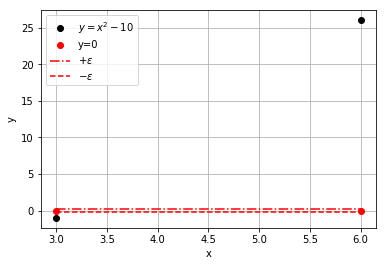

In [5]:
py.clf()
plot(3, 6)

다시 $3 \le x \le 6$ 구간을 $3 \le x \le 4.5$, $4.5 \le x \le 6$ 두 구간으로 나누자.<br>
Again, let's divide this $3 \le x \le 6$ interval into $3 \le x \le 4.5$ and  $4.5 \le x \le 6$ intervals.

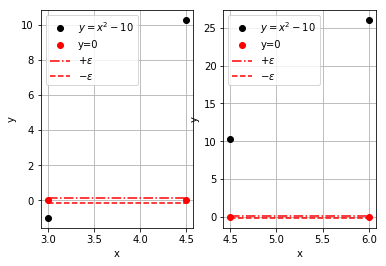

In [51]:
py.clf()

py.subplot(1, 2, 1)
plot(3, 4.5)

py.subplot(1, 2, 2)
plot(4.5, 6)

이번에는 $3 \le x \le 4.5$ 구간에서 부호가 바뀌었다.<br>
This time, the sign changed within the $3 \le x \le 4.5$ interval.

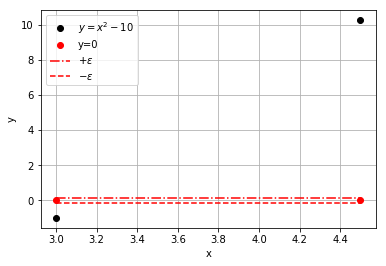

In [7]:
py.clf()
plot(3, 4.5)

이분법은 이렇게 근사해의 정밀도를 원하는 수준에 이를 때 까지 반복하는 것이다.<br>
The bisection method iterates this way until the precision of the approximate root reaches the desirable level.

### 이분법 구현<br>Implementing Bisection Method

아래 python 프로그램은 이분법으로 $\sqrt{10}$을 계산한다<br>Following python script calculates $\sqrt{10}$ using bisection method.

In [52]:
# y_i 의 절대값이 이 값 보다 작으면 y_i = 0으로 본다
# If absolute value of y_i is smaller than this, we would think y_i = 0.
epsilon = 1e-3

# 매개변수
# Parameters
# 초기 구간의 하한
# Lower end of the interval
x_lower = 0
# 초기 구간의 상한
# Upper end of the interval
x_upper = 6


# 이 함수를 0으로 만드는 x 를 찾고 싶음
# Want to find x making this function zero
def f(x):
    return x ** 2 - 10


def bisection(f, x_lower, x_upper, epsilon):
    """
    이분법
    Bisection Method
    
    f : f(x) = 0 을 만족하는 x 를 찾고자 하는 함수 Function that we want to find x satisfying f(x) = 0
    x_lower : 초기 구간의 하한 Lower end of the initial interval
    x_upper : 초기 구간의 상한 Upper end of the initial interval
    epsilon : 희망하는 근의 정밀도 Desirable precision of the root
    """

    counter = 0
    
    # 간격이 epsilon 보다 더 길다면 계속 반복
    # Iterate while the interval is longer than epsilon
    while abs(x_upper - x_lower) > epsilon:
        # 구간을 둘로 나누는 x 를 계산
        # Calculate x bisecting the interval
        x_new = (x_upper + x_lower) * 0.5
        
        counter += 1
        
        # x_new 와 x_upper 사이에서 f(x)의 부호가 바뀐다면
        # If f(x)'s sign changes between x_new and x_upper
        if 0 > (f(x_upper) * f(x_new)):
            # 구간의 하한을 변경
            # Change the lower end of the interval
            x_lower = x_new

        # 그렇지 않고 x_lower 와 x_new 사이에서 f(x)의 부호가 바뀐다면
        # Else if f(x)'s sign changes between x_lower and x_new
        elif 0 > (f(x_lower) * f(x_new)):
            # 구간의 상한을 변경
            # Change the upper end of the interval
            x_upper = x_new

        # 둘 다 아니라면
        # If none of above
        else:
            # 무언가 잘못된 것으로 보임
            # Seems something is not right

            f_x_lower=f(x_lower)
            f_x_upper=f(x_upper)

            # 예외를 발생 시킴
            # Raise an exception
            raise ValueError(f'Something is not right:\nf({x_lower}) = {f_x_lower}\n'
                             f'f({x_upper}) = {f_x_upper}'
            )

    print('counter =', counter)
            
    return x_new


sqrt_10 = bisection(f, 0, 6, epsilon)

# 이분법으로 찾은 10의 제곱근
# Square root of 10 that we just found using the bisection method
print('sqrt_10 =', sqrt_10)
# 아래 연산의 결과는 0인가?
# Is the result of the following calculation zero?
print('sqrt_10 ** 2 - 10 =', sqrt_10 ** 2 - 10)

counter = 13
sqrt_10 = 3.161865234375
sqrt_10 ** 2 - 10 = -0.0026082396507263184


초기 구간이 잘못되었다면?<br>What if initial interval is not correct?

In [53]:
# 해당 코드에서 예외(오류)가 발생할 경우 except 문 아래의 처리 절차를 실행
# In this code block, if an exception occurs, run exception handling lines under except
try:
    # 아래 행은 오류를 발생시킬 것임
    # This will fail
    sqrt_10_not_here = bisection(f, 6, 10, epsilon) 
except ValueError as e:
    print(e)


Something is not right:
f(6) = 26
f(10) = 90


도전 과제 : $sin^2(\theta)=0.5$ 인 $\theta^{\circ}$를 $0^{\circ}$ ~ $90^{\circ}$도 범위 안에서 구해 보시오.<br>Try this: Find $\theta^{\circ}$ satisfying $sin^2(\theta)=0.5$ in $0^{\circ}$ ~ $90^{\circ}$ interval.

In [15]:
 x_interval=None